<a href="https://colab.research.google.com/github/git-jayapriya/-Credit-Shield-/blob/main/etsint(credictshield).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


🔐 CreditShield
(Fraud Detection Model for Credit Card Transactions)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df = pd.read_csv("credit_card_fraud.csv" )

# Preprocessing Plan (to make it work with Random Forest):

In [ ]:
#  Drop TransactionID (not useful)
df = df.drop(columns=['TransactionID'])

In [ ]:
# Step 2: One-hot encode TransactionType and Location
df = pd.get_dummies(df, columns=['TransactionType', 'Location'], drop_first=True)

In [ ]:

df = df.drop(columns=['TransactionDate'])

In [ ]:
x=df.drop(columns=['IsFraud'])
y = df["IsFraud"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [ ]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = rf.predict(X_test)
a=accuracy_score(y_test,y_pred)
print(a)
cm = confusion_matrix(y_test,y_pred)
print(cm)
cr = classification_report(y_test,y_pred)
print(cr)

0.9903
[[19806     1]
 [  193     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     19807
           1       0.00      0.00      0.00       193

    accuracy                           0.99     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.98      0.99      0.99     20000



<Axes: >

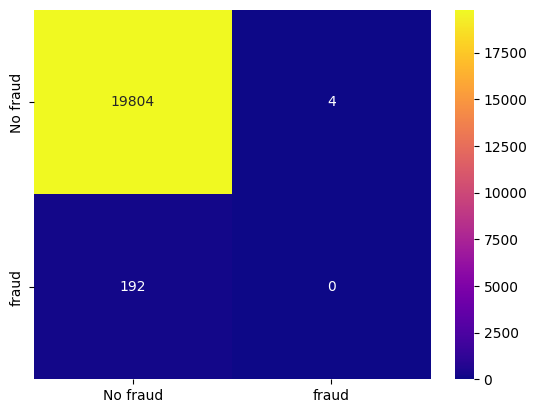

In [ ]:
sns.heatmap(cm, annot=True, cmap='plasma', xticklabels=["No fraud", "fraud"], yticklabels=["No fraud", "fraud"],fmt='d')



In [ ]:
new_transaction = pd.DataFrame([{
    'Amount': 3500.00,
    'MerchantID': 502,
    'Minute': 15,
    'Second': 35,
    'Microsecond': 500000,
    'TransactionType_purchase': 0,
    'TransactionType_refund': 1,
    'Location_Dallas': 0,
    'Location_New York': 0,
    'Location_Philadelphia': 0,
    'Location_Phoenix': 0,
    'Location_San Antonio': 1
}])


In [ ]:
new_transaction = new_transaction.reindex(columns=x.columns, fill_value=0)

# Predict
prediction = rf.predict(new_transaction)

# Result
if prediction[0] == 1:
    print("🚨 Prediction: FRAUDULENT TRANSACTION!")
else:
    print("✅ Prediction: Legitimate transaction.")

✅ Prediction: Legitimate transaction.
